# 一、基本信息

1. 实验名称：Seaborn泰坦尼克号幸存者数据可视化分析
2. 实验学时：2
3. 实验类别：基本应用性
4. 课程名称：数据分析基础（Python）
5. 课程编号：12002CC019


# 二、实验目的（预期学习效果）



本实验应符合课程总体学习要求，促进以下预期效果的达成：
* 掌握Python可视化常用工具，实现Python数据可视化操作，提高数据分析能力。

涉及主要KT点包括：
* KT26_Seaborn风格设置
* KT27_Seaborn中的常用绘图

实验应当促使学生掌握相关KT点，并且在实际数据分析过程当中进行应用。

# 三、实验任务及原理



本次实验使用Seaborn库中自带的泰坦尼克号幸存者数据“titanic”进行数据分析与可视化。

# 四、实验环境

实验仪器设备：计算机。

实验软件：Jupyter Notebook。

工具耗材：无。

# 五、实验预习任务



实验前，应复习本实验涉及的KT点，并完成前次布置的相关练习题目，并阅读相关参考性资料，做好实验前准备。

# 六、实验过程（实验方案）




## 导入模块

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
%matplotlib inline

## **任务1** Seaborn风格设置 
对Seaborn包进行导入，并且设置风格。

In [2]:
import seaborn as sns
sns.set_context("paper",font_scale = 2.0)

## 获取数据

In [3]:
# 通过sns.load_dataset导入seaborn自带数据集
titanic = sns.load_dataset('titanic')
#titanic = pd.read_csv('.\data\titanic.csv')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 查看有无缺失值

In [4]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df = titanic

In [6]:
df = titanic
# 删除含有缺失年龄的观察
df.dropna(subset=['age'], inplace=True)

## **任务2** Seaborn中绘图
通过使用Seaborn进行可视化图形的绘制。

## **问题1:** 通过plt绘制直方图（复习Matplotlib）


## 操作说明：
调用plt的hist方法来构建直方图。预期效果见下图。

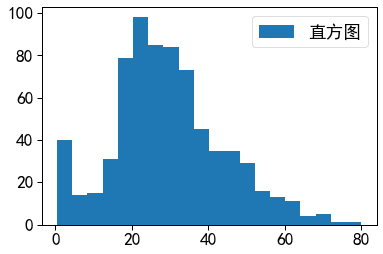

In [7]:
# 绘图：乘客年龄的频数直方图,绘图数据,指定直方图的条形数为20个
plt.hist(df["age"],bins = 20,label = '直方图' )
# 显示图例
plt.legend()

## 用年龄的均值进行缺失值的填充，再进行年龄分布的可视化；

In [8]:
mean =titanic['age'] .mean()
print(mean)
#用均值进行缺失值的填充
titanic['age'] = titanic['age'].fillna(mean)
titanic.isnull().sum()

29.69911764705882


survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           530
embark_town      2
alive            0
alone            0
dtype: int64

## **问题2:** 绘制Seaborn直方图,查看乘客年龄分布状况


## 操作说明：
调用sns的distplot方法来构建Seaborn直方图。预期效果见下图。

D:\Software\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

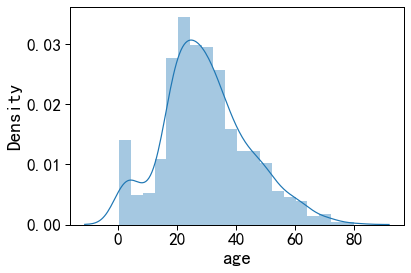

In [9]:
# 绘制Seaborn直方图,查看乘客年龄分布状况
sns.distplot(titanic["age"])
#FutureWarning：distplot是已弃用的函数，将在以后的版本中删除。 
#请修改您的代码以使用“ displot”（具有类似灵活性的图形级函数）或“ histplot”（直方图的轴级函数）。
#使用displot函数图形会发生变化，故不做修改

## 显示登船地点（S，C，Q）的人数；

In [10]:
titanic['embarked'].value_counts()


S    554
C    130
Q     28
Name: embarked, dtype: int64

## 对登船地点进行缺失值的填充（填充为S）

In [11]:
titanic['embarked'].isnull().sum()

2

In [12]:
titanic['embarked'] = titanic['embarked'].fillna("S")
titanic['embarked'].isnull().sum()


0

## 对于deck字段，由于缺失值太多，将其删除；

In [13]:
del titanic['deck']
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


## 数据探索

## 可视化乘客的性别分布；

## **问题3:** 绘制Seaborn直方图,查看乘客性别分布状况


## 操作说明：
调用sns的distplot方法来构建Seaborn直方图。预期效果见下图。


<AxesSubplot:xlabel='sex', ylabel='count'>

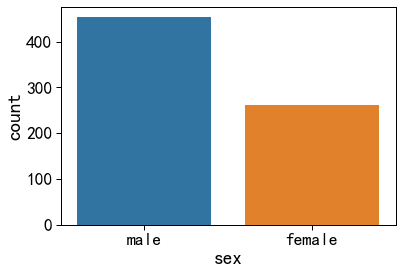

In [14]:
# 绘制Seaborn直方图,查看乘客性别分布状况
sns.countplot(x="sex",data=titanic)


## **问题4:** 基于性别，绘制乘客年龄分布箱线图


## 操作说明：
调用sns的boxplot方法来绘制乘客年龄分布箱线图。预期效果见下图。

<AxesSubplot:xlabel='sex', ylabel='age'>

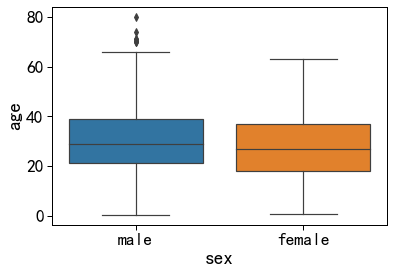

In [15]:
# 基于性别，绘制乘客年龄分布箱线图
sns.boxplot(x="sex", y="age",data=titanic)


## 对船舱等级进行计数

## **问题5:** 对船舱等级绘制计数柱状图


## 操作说明：
调用sns的countplot方法对船舱等级绘制计数柱状图。预期效果见下图。

<AxesSubplot:xlabel='class', ylabel='count'>

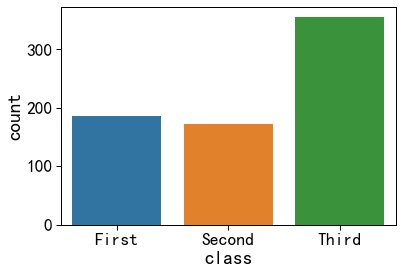

In [16]:
# 对船舱等级绘制计数柱状图
sns.countplot(x="class",data=titanic)



## **问题6:** 结合船舱等级，绘制乘客年龄分布的小提琴图


## 操作说明：
调用sns的violinplot方法。预期效果见下图。

<AxesSubplot:xlabel='class', ylabel='age'>

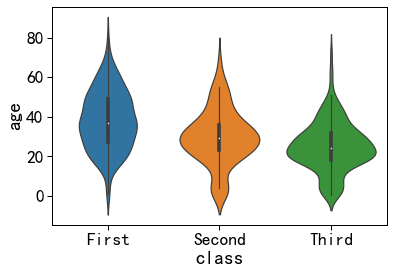

In [17]:
# 结合船舱等级，绘制乘客年龄分布的小提琴图
sns.violinplot(y='age',x = 'class', data = titanic)


## **问题7:** 针对alone绘制计数柱状图


## 操作说明：
调用sns的countplot方法。预期效果见下图。

<AxesSubplot:xlabel='alone', ylabel='count'>

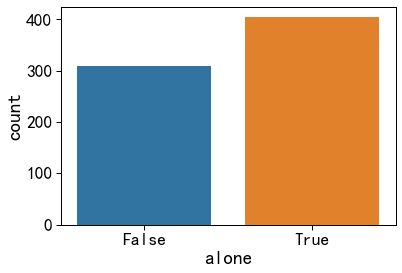

In [18]:
# 针对alone绘制计数柱状图
sns.countplot(x='alone',data=titanic)

## 对年龄进行分级，分开小孩和老人的数据；

In [19]:
def agelevel(age):
    if age<=16:
        return 'child'
    elif age>=60:
        return 'old'
    else:
        return 'middle'
titanic['age_level']=titanic['age'].map(agelevel)
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_level
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,middle
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,middle
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,middle
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,middle
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,middle


## **问题8:** 对分级后的年龄可视化，绘制计数柱状图。预期效果见下图。


## 操作说明：
调用sns的countplot方法

<AxesSubplot:xlabel='age_level', ylabel='count'>

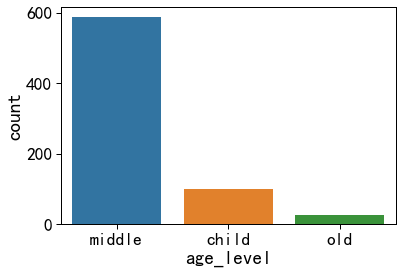

In [20]:
# 对分级后的年龄可视化，绘制计数柱状图
sns.countplot(x='age_level',data=titanic)

## **问题9:** 通过绘制计数柱状图可视化分析乘客年龄与生还乘客之间的关系


## 操作说明：
调用`sns`的`countplot`方法，设置两个参数`x`和`hue`，其中`x`的值为`alive`，`hue`的值为`age_level`。预期效果见下图。

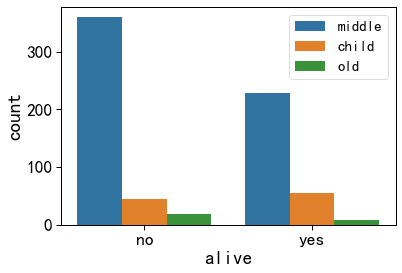

In [21]:
# 通过绘制计数柱状图可视化分析乘客年龄与生还乘客之间的关系
sns.countplot(x='alive',hue='age_level',data=titanic)
plt.legend(loc = "best",fontsize='15')

# 七、实验课后任务



学生应当完成本次实验涉及相关任务，完成本次Jupyter Notebook实验报告以后，应将本实验报告文件（.ipynb）按照授课教师指定方式进行上传。


# 八、实验考核



实验满分100分，共9个任务，任务1-任务8每个11分，任务9分数12分。按照学生完成任务的程度、代码运行结果、分析结果等质量标准酌情给出对应分数。

# 九、实验资源



实验资源包括本笔记本文档及配属数据。

相关链接：
[Seaborn官方网站](https://seaborn.pydata.org/examples/index.html)

